In [2]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [3]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [4]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [5]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [6]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.17604578423438344, 0.5738776486913295],
 'diameter': 55.434643729584785,
 'confidence': 1.0,
 'timestamp': 763603.5474469999,
 'sphere': {'center': [0.8802762369435216,
   2.078909388725492,
   32.038025268498394],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [103.6362918512331, 114.23424964243314],
  'axes': [221.09714814578155, 221.09714814578155],
  'angle': 0.0},
 'circle_3d': {'center': [-4.725831730778437,
   -0.9680845602882782,
   23.83513667185649],
  'normal': [-0.5394479907117298, -0.2931971294470435, -0.7893233232339528],
  'radius': 2.010154658508117},
 'diameter_3d': 4.020309317016234,
 'ellipse': {'center': [33.80079057300162, 81.81549145126473],
  'axes': [41.17650619007769, 55.434643729584785],
  'angle': 26.31449830211448},
 'location': [33.80079057300162, 81.81549145126473],
 'model_confidence': 1.0,
 'theta': 1.868365553487306,
 'phi': -2.170315354602055}

Text(0.5, 0, 'Pupil timestamp (s)')

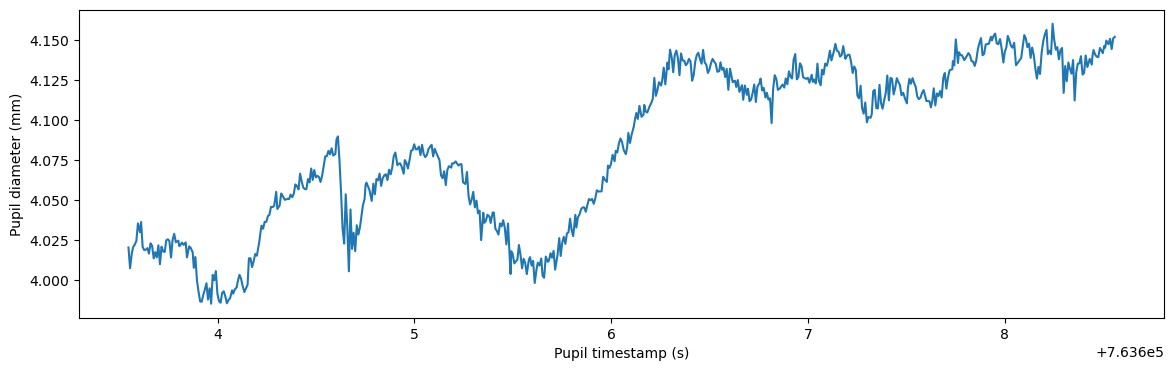

In [7]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')